In [1]:
# 1)OSI Layer Simulation

layers = [
    "Physical Layer",
    "Data Link Layer",
    "Network Layer",
    "Transport Layer",
    "Session Layer",
    "Presentation Layer",
    "Application Layer"
]

def osi_model(data):
    print("Encapsulation:")
    for layer in reversed(layers):
        data = f"{layer} Header -> {data}"
        print(data)

    print("\nDecapsulation:")
    for layer in layers:
        data = data.replace(f"{layer} Header -> ", "", 1)
        print(f"Removing {layer} Header: {data}")

osi_model("Hello World")

Encapsulation:
Application Layer Header -> Hello World
Presentation Layer Header -> Application Layer Header -> Hello World
Session Layer Header -> Presentation Layer Header -> Application Layer Header -> Hello World
Transport Layer Header -> Session Layer Header -> Presentation Layer Header -> Application Layer Header -> Hello World
Network Layer Header -> Transport Layer Header -> Session Layer Header -> Presentation Layer Header -> Application Layer Header -> Hello World
Data Link Layer Header -> Network Layer Header -> Transport Layer Header -> Session Layer Header -> Presentation Layer Header -> Application Layer Header -> Hello World
Physical Layer Header -> Data Link Layer Header -> Network Layer Header -> Transport Layer Header -> Session Layer Header -> Presentation Layer Header -> Application Layer Header -> Hello World

Decapsulation:
Removing Physical Layer Header: Data Link Layer Header -> Network Layer Header -> Transport Layer Header -> Session Layer Header -> Presentati

In [2]:
# 2) ARP and RARP simulation using dictionaries

# Simulated network table: IP -> MAC
network_table = {
    "192.168.0.1": "AA:BB:CC:DD:EE:01",
    "192.168.0.2": "AA:BB:CC:DD:EE:02",
    "192.168.0.3": "AA:BB:CC:DD:EE:03"
}

# RARP table: MAC -> IP
rarp_table = {v: k for k, v in network_table.items()}

# Function to simulate ARP
def arp(ip):
    mac = network_table.get(ip)
    if mac:
        print(f"ARP: IP address {ip} is at MAC address {mac}")
    else:
        print(f"ARP: IP address {ip} not found in the network table.")

# Function to simulate RARP
def rarp(mac):
    ip = rarp_table.get(mac.upper())
    if ip:
        print(f"RARP: MAC address {mac} belongs to IP address {ip}")
    else:
        print(f"RARP: MAC address {mac} not found in the network table.")

# Example usage
arp("192.168.0.2")
rarp("AA:BB:CC:DD:EE:03")

ARP: IP address 192.168.0.2 is at MAC address AA:BB:CC:DD:EE:02
RARP: MAC address AA:BB:CC:DD:EE:03 belongs to IP address 192.168.0.3


In [3]:
# 3)CRC Error Detection


def xor(a, b):
    result = ""
    for i in range(1, len(b)):
        result += '0' if a[i] == b[i] else '1'
    return result

def mod2div(dividend, divisor):
    pick = len(divisor)
    tmp = dividend[0:pick]
    while pick < len(dividend):
        tmp = xor(divisor, tmp) + dividend[pick]
        pick += 1
    return xor(divisor, tmp)

def encodeData(data, key):
    appended_data = data + '0'*(len(key)-1)
    remainder = mod2div(appended_data, key)
    return data + remainder

data = "1010101"
key = "1101"
print("Encoded Data (CRC):", encodeData(data, key))

Encoded Data (CRC): 1010101011


In [5]:
# 4)Hamming Code for error correction (7,4)*


def calcParityBits(data):
    p1 = data[0] ^ data[1] ^ data[3]
    p2 = data[0] ^ data[2] ^ data[3]
    p3 = data[1] ^ data[2] ^ data[3]
    return [p1, p2, data[0], p3, data[1], data[2], data[3]]

data = [1, 0, 1, 1]
code = calcParityBits(data)
print("Hamming Code:", code)

Hamming Code: [0, 1, 1, 0, 0, 1, 1]


In [7]:
# 5)flow_error
def stop_and_wait(frames):
    for i, frame in enumerate(frames):
        print(f"Sending frame {i}")
        print(f"Acknowledgment for frame {i} received\n")

stop_and_wait(["A", "B", "C"])

def go_back_n(window_size):
    for i in range(0, 10, window_size):
        print(f"Sending frames {i} to {i+window_size-1}")
        print("ACK lost! Resending all...\n")

go_back_n(3)


received = [True, False, True, True]

for i, ack in enumerate(received):
    if not ack:
        print(f"Frame {i} not acknowledged. Resending...")
    else:
        print(f"Frame {i} acknowledged.")

Sending frame 0
Acknowledgment for frame 0 received

Sending frame 1
Acknowledgment for frame 1 received

Sending frame 2
Acknowledgment for frame 2 received

Sending frames 0 to 2
ACK lost! Resending all...

Sending frames 3 to 5
ACK lost! Resending all...

Sending frames 6 to 8
ACK lost! Resending all...

Sending frames 9 to 11
ACK lost! Resending all...

Frame 0 acknowledged.
Frame 1 not acknowledged. Resending...
Frame 2 acknowledged.
Frame 3 acknowledged.


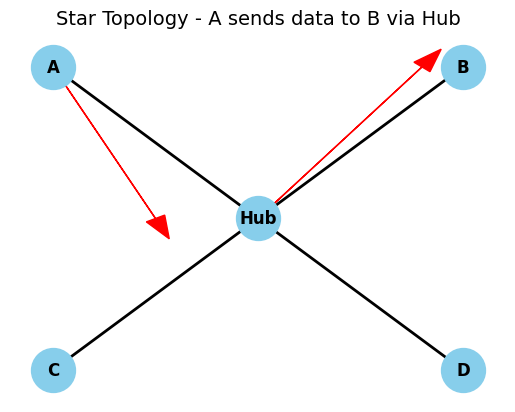

In [8]:
# 6)star topology
import matplotlib.pyplot as plt
import networkx as nx

def draw_star_topology():
    # Create a star graph with a central hub (node 0)
    G = nx.Graph()
    devices = ['A', 'B', 'C', 'D']
    hub = 'Hub'

    positions = {
        'A': (-1, 1),
        'B': (1, 1),
        'C': (-1, -1),
        'D': (1, -1),
        'Hub': (0, 0)
    }

    G.add_node(hub)
    for device in devices:
        G.add_node(device)
        G.add_edge(hub, device)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos=positions, node_color='skyblue', node_size=1000)
    # Draw edges
    nx.draw_networkx_edges(G, pos=positions, width=2)
    # Draw labels
    nx.draw_networkx_labels(G, pos=positions, font_size=12, font_weight='bold')

    # Add arrow for communication from A -> B via Hub
    plt.arrow(-1, 1, 0.5, -1, head_width=0.1, color='red')  # A to Hub
    plt.arrow(0, 0, 0.8, 1, head_width=0.1, color='red')   # Hub to B

    plt.title("Star Topology - A sends data to B via Hub", fontsize=14)
    plt.axis('off')
    plt.show()

draw_star_topology()#

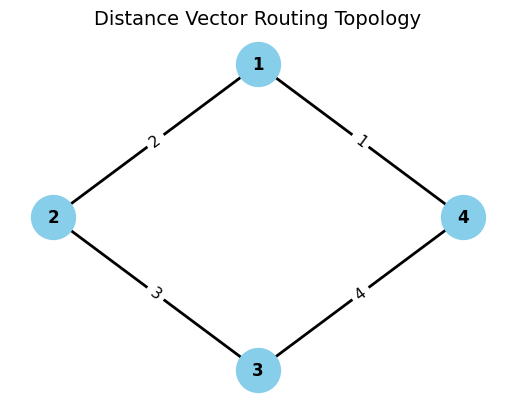

In [9]:
# 7)distance routing algorithm
import matplotlib.pyplot as plt
import networkx as nx

def draw_distance_vector_topology():
    # Create graph
    G = nx.Graph()

    # Add nodes (routers)
    routers = ['1', '2', '3', '4']
    G.add_nodes_from(routers)

    # Add edges with weights (costs)
    edges = [
        ('1', '2', 2),
        ('1', '4', 1),
        ('2', '3', 3),
        ('3', '4', 4)
    ]
    G.add_weighted_edges_from(edges)

    # Define positions for layout
    positions = {
        '1': (0, 1),
        '2': (-1, 0),
        '3': (0, -1),
        '4': (1, 0)
    }

    # Draw nodes
    nx.draw_networkx_nodes(G, pos=positions, node_color='skyblue', node_size=1000)

    # Draw edges with widths
    nx.draw_networkx_edges(G, pos=positions, width=2)

    # Draw labels for routers
    nx.draw_networkx_labels(G, pos=positions, font_size=12, font_weight='bold')

    # Draw edge labels (costs)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels, font_size=11)

    plt.title("Distance Vector Routing Topology", fontsize=14)
    plt.axis('off')
    plt.show()

draw_distance_vector_topology()


In [10]:
# 8)Token Bucket
import time

class TokenBucket:
    def __init__(self, capacity, refill_rate):
        """
        capacity: max tokens in the bucket
        refill_rate: tokens added per second
        """
        self.capacity = capacity
        self.tokens = capacity
        self.refill_rate = refill_rate
        self.last_checked = time.time()

    def allow_request(self, tokens_required=1):
        current_time = time.time()
        time_passed = current_time - self.last_checked
        # Refill tokens based on time passed
        self.tokens += time_passed * self.refill_rate
        self.tokens = min(self.capacity, self.tokens)
        self.last_checked = current_time

        if self.tokens >= tokens_required:
            self.tokens -= tokens_required
            return True
        else:
            return False

# Example Usage
bucket = TokenBucket(capacity=5, refill_rate=1)  # 1 token/sec, 5 max

for i in range(10):
    if bucket.allow_request():
        print(f"Request {i+1} allowed ✅")
    else:
        print(f"Request {i+1} denied ❌")
    time.sleep(0.5)


Request 1 allowed ✅
Request 2 allowed ✅
Request 3 allowed ✅
Request 4 allowed ✅
Request 5 allowed ✅
Request 6 allowed ✅
Request 7 allowed ✅
Request 8 allowed ✅
Request 9 allowed ✅
Request 10 denied ❌


In [11]:
# 9)leaky bucket
import time

class LeakyBucket:
    def __init__(self, capacity, leak_rate):
        self.capacity = capacity        # maximum capacity of bucket
        self.leak_rate = leak_rate      # leak rate (requests per second)
        self.water = 0                  # current water level (requests in bucket)
        self.last_checked = time.time() # last time bucket state was updated

    def allow_request(self):
        current_time = time.time()
        time_passed = current_time - self.last_checked
        leaked_water = time_passed * self.leak_rate
        self.water = max(0, self.water - leaked_water)
        self.last_checked = current_time

        if self.water < self.capacity:
            self.water += 1
            return True
        else:
            return False

# Example usage
bucket = LeakyBucket(capacity=5, leak_rate=1)  # 5 requests max, leaks 1 per second

for i in range(10):
    if bucket.allow_request():
        print(f"Request {i+1}: Allowed")
    else:
        print(f"Request {i+1}: Denied")
    time.sleep(0.5)  # simulate incoming requests every 0.5s


Request 1: Allowed
Request 2: Allowed
Request 3: Allowed
Request 4: Allowed
Request 5: Allowed
Request 6: Allowed
Request 7: Allowed
Request 8: Allowed
Request 9: Allowed
Request 10: Allowed


In [12]:
# 10)web
import socket

def get_webpage(host, path="/"):
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.connect((host, 80))

    request = f"GET {path} HTTP/1.1\r\nHost: {host}\r\nConnection: close\r\n\r\n"
    s.sendall(request.encode())

    response = b""
    while True:
        chunk = s.recv(1024)
        if not chunk:
            break
        response += chunk

    s.close()
    return response.decode(errors='ignore')  # Handle decoding issues

# Example use
html_data = get_webpage("www.example.com")
print(html_data)


HTTP/1.1 200 OK
Content-Type: text/html
ETag: "84238dfc8092e5d9c0dac8ef93371a07:1736799080.121134"
Last-Modified: Mon, 13 Jan 2025 20:11:20 GMT
Cache-Control: max-age=1786
Date: Thu, 24 Apr 2025 04:45:52 GMT
Content-Length: 1256
Connection: close
X-N: S

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
     

In [14]:
# 11)IPV4 address validator
import re

def is_valid_ipv4(ip):
    pattern = r'^([0-9]{1,3}\.){3}[0-9]{1,3}$'
    if re.match(pattern, ip):
        parts = ip.split('.')
        for part in parts:
            if int(part) < 0 or int(part) > 255:
                return False
        return True
    return False

def get_ip_class(ip):
    first_octet = int(ip.split('.')[0])
    if 1 <= first_octet <= 126:
        return 'A'
    elif 128 <= first_octet <= 191:
        return 'B'
    elif 192 <= first_octet <= 223:
        return 'C'
    elif 224 <= first_octet <= 239:
        return 'D (Multicast)'
    elif 240 <= first_octet <= 255:
        return 'E (Reserved)'
    else:
        return 'Invalid'

def is_private_ip(ip):
    parts = list(map(int, ip.split('.')))
    if parts[0] == 10:
        return True
    elif parts[0] == 172 and 16 <= parts[1] <= 31:
        return True
    elif parts[0] == 192 and parts[1] == 168:
        return True
    else:
        return False

# Example Usage
ip_address = input("Enter an IPv4 address: ")

if is_valid_ipv4(ip_address):
    print("✅ Valid IPv4 address.")
    print("Class:", get_ip_class(ip_address))
    print("Private IP:" if is_private_ip(ip_address) else "Public IP.")
else:
    print("❌ Invalid IPv4 address.")


Enter an IPv4 address: 128.162.23.251
✅ Valid IPv4 address.
Class: B
Public IP.


In [15]:
# 12) IPV6 address validator
import ipaddress

def is_valid_ipv6(ip):
    try:
        # Validate using ipaddress module
        ipaddress.IPv6Address(ip)
        return True
    except ipaddress.AddressValueError:
        return False

# Example Usage
ip_address = input("Enter an IPv6 address: ")

if is_valid_ipv6(ip_address):
    print("✅ Valid IPv6 address.")
else:
    print("❌ Invalid IPv6 address.")


Enter an IPv6 address: 2001:db8:85a3::8a2e:370:7334
✅ Valid IPv6 address.


In [16]:
# 13)link state routing algorithm
import heapq

# Number of routers
n = 4

# Adjacency list with (cost, destination)
graph = {
    0: [(1, 1), (2, 3)],
    1: [(0, 1), (2, 1), (3, 4)],
    2: [(0, 3), (1, 1), (3, 2)],
    3: [(1, 4), (2, 2)]
}

# Dijkstra’s Algorithm
def dijkstra(src):
    dist = [float('inf')] * n
    dist[src] = 0
    queue = [(0, src)]

    while queue:
        current_dist, u = heapq.heappop(queue)
        for v, weight in graph[u]:
            if dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                heapq.heappush(queue, (dist[v], v))
    return dist

# Compute shortest path for each router
for i in range(n):
    distances = dijkstra(i)
    print(f"Router {i}'s Table: {distances}")


Router 0's Table: [0, 1, 2, 4]
Router 1's Table: [1, 0, 1, 3]
Router 2's Table: [2, 1, 0, 2]
Router 3's Table: [4, 3, 2, 0]


In [17]:
# 14)Broadcastig
import socket

def broadcast_message(message, broadcast_ip="255.255.255.255", port=9999):
    # Create a socket for broadcasting
    sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    sock.setsockopt(socket.SOL_SOCKET, socket.SO_BROADCAST, 1)

    # Send the message to the broadcast address
    sock.sendto(message.encode(), (broadcast_ip, port))
    print(f"Broadcasting message to {broadcast_ip}:{port}")

# Example usage
message = "Hello, this is a broadcast message!"
broadcast_message(message)


Broadcasting message to 255.255.255.255:9999


In [20]:
# 15)Multicasting
import socket
import struct

def multicast_message(message, multicast_ip="224.0.0.1", port=9999):
    # Create a socket for multicasting
    sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM, socket.IPPROTO_UDP)

    # Allow reuse of address (for multicast)
    sock.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)

    # Set the time-to-live (TTL) for multicast packets (e.g., 255 for the whole internet)
    ttl = struct.pack('B', 255)  # Use 'B' instead of 'b' for values 0-255
    sock.setsockopt(socket.IPPROTO_IP, socket.IP_MULTICAST_TTL, ttl)

    # Send the message to the multicast group address
    sock.sendto(message.encode(), (multicast_ip, port))
    print(f"Multicasting message to {multicast_ip}:{port}")

# Example usage
message = "Hello, this is a multicast message!"
multicast_message(message)


Multicasting message to 224.0.0.1:9999


In [21]:

# 16)Selective Repeat ARQ

def selective_repeat(frames, window_size):
    for i in range(0, len(frames), window_size):
        window = frames[i:i+window_size]
        print(f"Sending frames: {window}")
        print("Only errored frames will be resent.\n")

selective_repeat(["F1", "F2", "F3", "F4", "F5"], 2)

Sending frames: ['F1', 'F2']
Only errored frames will be resent.

Sending frames: ['F3', 'F4']
Only errored frames will be resent.

Sending frames: ['F5']
Only errored frames will be resent.



In [23]:
# 17)Slotted ALOHA Simulation


import random

def slotted_aloha():
    slots = 10
    success = 0
    for t in range(slots):
        users = random.choices([0,1], k=5)
        if users.count(1) == 1:
            success += 1
    print("Successful Transmissions:", success)

slotted_aloha()

Successful Transmissions: 2


In [25]:
# 18)DDNS
import requests
import json

# Cloudflare API settings
api_url = "https://api.cloudflare.com/client/v4"
api_token = "your_cloudflare_api_token"  # Replace with your Cloudflare API Token
zone_id = "your_zone_id"  # Replace with your Cloudflare Zone ID
record_id = "your_record_id"  # Replace with your DNS record ID (A record ID)
dns_name = "example.com"  # The domain or subdomain you want to update (e.g., 'home.example.com')

# Function to get the current public IP address
def get_current_ip():
    try:
        response = requests.get("https://api.ipify.org?format=json")
        ip_data = response.json()
        return ip_data['ip']
    except requests.RequestException as e:
        print(f"Error fetching IP: {e}")
        return None

# Function to update the DNS record
def update_ddns(current_ip):
    headers = {
        "Authorization": f"Bearer {api_token}",
        "Content-Type": "application/json"
    }

    # Prepare data to update the A record with the new IP address
    data = {
        "type": "A",  # Type of DNS record (A for IPv4)
        "name": dns_name,  # The DNS name to update
        "content": current_ip,  # The new IP address to update
        "ttl": 1,  # TTL (time to live) in seconds (1 for automatic expiration)
        "proxied": False  # Set to False if you do not want Cloudflare proxying the traffic
    }

    # API endpoint to update DNS record
    update_url = f"{api_url}/zones/{zone_id}/dns_records/{record_id}"

    # Send the request to update the DNS record
    response = requests.put(update_url, headers=headers, data=json.dumps(data))

    if response.status_code == 200:
        print(f"Successfully updated DNS record for {dns_name} to {current_ip}")
    else:
        print(f"Error updating DNS record: {response.status_code}, {response.text}")

# Main function to check IP and update DDNS
def main():
    current_ip = get_current_ip()
    if current_ip:
        print(f"Current IP: {current_ip}")
        update_ddns(current_ip)
    else:
        print("Failed to retrieve current IP.")

# Run the DDNS update
if __name__ == "__main__":
    main()


Current IP: 34.145.193.55
Error updating DNS record: 404, {"result":null,"success":false,"errors":[{"code":7003,"message":"Could not route to /client/v4/zones/your_zone_id/dns_records/your_record_id, perhaps your object identifier is invalid?"}],"messages":[]}


In [26]:
# 19)Firewall simulation
import socket

# Define simple firewall rules (allow/deny IPs and ports)
ALLOW_RULES = [
    ('192.168.1.100', 80),  # Allow traffic from this IP on port 80 (HTTP)
    ('192.168.1.101', 22),  # Allow traffic from this IP on port 22 (SSH)
]

BLOCK_RULES = [
    ('192.168.1.105', 80),  # Block traffic from this IP on port 80
    ('192.168.1.106', 443),  # Block traffic from this IP on port 443
]

def check_firewall(ip, port):
    # Check if the connection is allowed based on the rules
    if (ip, port) in ALLOW_RULES:
        print(f"Allowed: {ip}:{port}")
        return True
    elif (ip, port) in BLOCK_RULES:
        print(f"Blocked: {ip}:{port}")
        return False
    else:
        print(f"Unknown: {ip}:{port}, action taken: Blocked by default.")
        return False

# Simulate receiving a connection attempt
def simulate_connection(ip, port):
    if check_firewall(ip, port):
        print(f"Connection allowed from {ip} on port {port}.")
    else:
        print(f"Connection blocked from {ip} on port {port}.")

# Example Usage
simulate_connection('192.168.1.100', 80)  # Allowed
simulate_connection('192.168.1.106', 443)  # Blocked
simulate_connection('192.168.1.200', 25)  # Default blocked


Allowed: 192.168.1.100:80
Connection allowed from 192.168.1.100 on port 80.
Blocked: 192.168.1.106:443
Connection blocked from 192.168.1.106 on port 443.
Unknown: 192.168.1.200:25, action taken: Blocked by default.
Connection blocked from 192.168.1.200 on port 25.


In [33]:

# 20)CSMA/CD Simulation

import random

def csma_cd():
    attempts = 0
    while True:
        attempts += 1
        print("Checking if line is idle...")
        if random.random() > 0.2:
            print("Transmitting data...")
            if random.random() < 0.1:
                print("Collision detected! Sending jamming signal...\n")
            else:
                print("Data sent successfully.\n")
                break

csma_cd()

Checking if line is idle...
Checking if line is idle...
Transmitting data...
Data sent successfully.

